In [1]:
NAME = "Alasdair Breasley"
CIS_USERNAME = "fmcv76"

---

# COMP42415 Text Mining and Language Analytics
## Coursework 2023-24

### Instructions:

- <ins>**DO NOT RENAME THIS JUPYTER NOTEBOOK !!!**</ins>
- Please write the answers for each question in the respective cell. 
- You can add more cells if needed.
- If needed, you can upload additional files, e.g. pre-trained word embeddings, in the coursework's directory
- You can safely remove the `raise NotImplementedError()` line from each code cell.
- You can find information about markdown syntax from [here](https://www.markdownguide.org/basic-syntax/#emphasis).

In [2]:
# Import required packages 
import numpy as np
import pandas as pd
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
nltk.download("averaged_perceptron_tagger")
from nltk import pos_tag
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score, recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Use seaborn plotting style
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import gensim
from gensim.models import Word2Vec
import ast


<ipython-input-2-48222c7f87ac>:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package stopwords to
[nltk_data]     /home3/fmcv76/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home3/fmcv76/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home3/fmcv76/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home3/fmcv76/nltk_data...
[nltk_data]   Package averaged_perc

In [3]:
# Controls 
class_balance_sampling = False
subset_data = False
subset_size = 50000 # Total size of the subset used for training and testing 
run_kNN = True

load_preprocessed_data = True

## Implementation - Task 1
Prepare the dataset by applying any pre-processing or cleaning steps that you consider as necessary. Then, split the dataset into a training set containing 70% of the samples and a test set containing 30% of the samples. Follow an appropriate strategy for the split. You must use these training/test sets for all the models in this coursework. (**10%**)

In [4]:
if (load_preprocessed_data != True):
    
    # Import food reviews data 
    food_reviews_data = pd.read_csv("food_reviews.csv")
    
    # Check dataframe head 
    print(food_reviews_data.head(5), "\n")
    
    # Check dataframe shape 
    print(food_reviews_data.shape, "\n")
    
    # Check data types 
    print(food_reviews_data.dtypes, "\n")
    
    # Check uniqueness of Score column 
    print(food_reviews_data["Score"].unique(), "\n")
    
    # Check for duplicate rows 
    print(food_reviews_data[food_reviews_data.duplicated()].shape[0], "\n")
    
    # Remove duplicate rows 
    food_reviews_data = food_reviews_data.drop_duplicates()
    
    # Recheck dataframe shape 
    print(food_reviews_data.shape, "\n")
    
    # Concatinate Summary column with Text column to capture all available information 
    food_reviews_data["Text"] = food_reviews_data["Summary"].astype(str) + " " + food_reviews_data["Text"].astype(str)
    
    # TODO: Decide if adding both columns together makes sense 
    
    # Check how many rows contain html tags 
    print(food_reviews_data["Text"].str.contains(r"<.+?>").sum(), "\n")
    
    # Replace html tags with " ", " " as opposed to "" to not join words unintentionally 
    food_reviews_data["Text"] = food_reviews_data["Text"].str.replace(r"<.+?>", " ", regex = True)
    
    # Recheck how many rows contain html tags 
    print(food_reviews_data["Text"].str.contains(r"<.+?>").sum(), "\n")
    
    # Transform Text column to all lowercase 
    food_reviews_data["Text"] = food_reviews_data["Text"].str.lower()
    
    # Check how many rows include happy or sad text emojis 
    print(food_reviews_data["Text"].str.contains(r"[:][)]|[:][(]|[)][:]|[(][:]").sum(), "\n")
    
    # Replace happy emojis with " happy " 
    food_reviews_data["Text"] = food_reviews_data["Text"].str.replace(r"[:][)]|[(][:]", " happy ", regex = True)
    
    # Replace sad emojis with " sad " 
    food_reviews_data["Text"] = food_reviews_data["Text"].str.replace(r"[:][(]|[)][:]", " sad ", regex = True)
    
    # Recheck how many rows include happy or sad text emojis 
    print(food_reviews_data["Text"].str.contains(r"[:][)]|[:][(]|[)][:]|[(][:]").sum(), "\n")
    
    # Check how many rows include punctuation 
    print(food_reviews_data["Text"].str.contains(r"[^\w\s]").sum(), "\n")
    
    # TODO: Decide if "'" should be removed at this point or if some of the later steps can handle don't etc. 
    
    # Remove punctuation 
    food_reviews_data["Text"] = food_reviews_data["Text"].str.replace(r"[^\w\s]", " ", regex = True)
    
    # Recheck how many rows include punctuation 
    print(food_reviews_data["Text"].str.contains(r"[^\w\s]").sum(), "\n")
    
    # Check for class imbalance 
    print(food_reviews_data["Score"].value_counts(), "\n")
    
    # There is class imbalance present 
    
    # Check dataframe head 
    print(food_reviews_data.head(5), "\n")


In [5]:
if (load_preprocessed_data != True):
    
    if (subset_data != True):
        
        subset_size = len(food_reviews_data)
        
        
    if (class_balance_sampling != True):
        
        # Temporarily reduce dataframe size for developement 
        food_reviews_data = food_reviews_data[0:subset_size]
        
        
    # Check for class imbalance 
    print(food_reviews_data["Score"].value_counts())
    
    # There is class imbalance present 
    

In [6]:
if (load_preprocessed_data != True):
    
    def penn_to_wordnet(penn_pos_tag):
        """Function to convert Penn Treeback POS tags to WordNet"""
        
        tag_dictionary = {"NN":"n", "JJ":"a","VB":"v", "RB":"r"}
        
        try:
            
            # If the first two characters of the Penn Treebank POS tag are in the tag_dictionary 
            return tag_dictionary[penn_pos_tag[:2]]
        
        except:
            
            return "n" # Default to Noun if no mapping avalable.
        
    
    # Get list of English stop words 
    stopwords_english = stopwords.words("english")
    
    def remove_stopwords_and_lemmatise(text):
        """Function to tokenise a string, remove stop words, lemmatise, and concatinate back together."""
        
        # Tokenise text into words 
        words = word_tokenize(text)
        
        # Remove stop words 
        words_filtered = [word for word in words if word not in stopwords_english]
        
        # TODO: Update to use full conversion table as opposed to simplified version 
        
        # Apply POS tagging 
        words_pos_tagged = pos_tag(words_filtered)
        
        # Create a WordNetLemmatizer object 
        wnl = WordNetLemmatizer()
        
        # Define empty lemmas list 
        lemmas = []
        
        # Loop through words in sentence and lemmatise 
        for word, tag in words_pos_tagged:
        
            lemmas.append(wnl.lemmatize(word, pos = penn_to_wordnet(tag)))
        
        # Concatinate remaining words back into a string 
        return lemmas
    
    
    #if (class_balance_sampling != True):
        
        # Remove stop words from Text column 
        #food_reviews_data_tokenised = food_reviews_data["Text"].apply(remove_stopwords_and_lemmatise)
    

In [7]:
if (load_preprocessed_data != True):
    
    if (class_balance_sampling != True):
        
        # Split data into training (70%) and test (30%) splits 
        train_data, test_data, train_labels, test_labels = train_test_split(food_reviews_data["Text"], food_reviews_data["Score"], 
                                                                            test_size = 0.3, random_state = 123, 
                                                                            stratify = food_reviews_data["Score"])
        
        # TODO: Decide if it should be stratified random sampling or random sampling 
        
        # Remove stop words from train data and lemmatise 
        train_data_tokenised = train_data.apply(remove_stopwords_and_lemmatise)
        
        # Join lists of lemmas to string (need both ways) 
        train_data = [" ".join(lemmas) for lemmas in train_data_tokenised]
        
        # Remove stop words from test data and lemmatise 
        test_data_tokenised = test_data.apply(remove_stopwords_and_lemmatise)
        
        # Join lists of lemmas to string (need both ways) 
        test_data = [" ".join(lemmas) for lemmas in test_data_tokenised]
    

In [8]:
if (load_preprocessed_data != True):
    
    # Save tokenised train data to csv 
    train_data_tokenised_csv = pd.Series(train_data_tokenised)
    train_data_tokenised_csv.to_csv("train_data_tokenised.csv")
    
    # Save train data to csv 
    train_data_csv = pd.DataFrame({"Text" : train_data, 
                                   "Score" : train_labels})
    train_data_csv.to_csv("train_data.csv")
    
    # Save tokenised test data to csv 
    test_data_tokenised_csv = pd.Series(test_data_tokenised)
    test_data_tokenised_csv.to_csv("test_data_tokenised.csv")
    
    # Save test data to csv 
    test_data_csv = pd.DataFrame({"Text" : test_data, 
                                  "Score" : test_labels})
    test_data_csv.to_csv("test_data.csv")
    

In [9]:
if (load_preprocessed_data == True):
    
    # Load preprocessed tokenised train data 
    train_data_tokenised = pd.read_csv("train_data_tokenised.csv", index_col = 0)["Text"].tolist()
    train_data_tokenised = [ast.literal_eval(text) for text in train_data_tokenised]
    
    # Load preprocessed train data 
    train_data = pd.read_csv("train_data.csv", index_col = 0)["Text"].tolist()
    
    # Load train labels 
    train_labels = pd.read_csv("train_data.csv", index_col = 0)["Score"].tolist()
    
    # Load preprocessed tokenised test data 
    test_data_tokenised = pd.read_csv("test_data_tokenised.csv", index_col = 0)["Text"].tolist()
    test_data_tokenised = [ast.literal_eval(text) for text in test_data_tokenised]
    
    # Load preprocessed test data 
    test_data = pd.read_csv("test_data.csv", index_col = 0)["Text"].tolist()
    
    # Load train labels 
    test_labels = pd.read_csv("test_data.csv", index_col = 0)["Score"].tolist()
    

In [10]:
if (load_preprocessed_data != True):
    
    if (class_balance_sampling == True):
        
        # Define the number of samples for the test set 
        n_samples_test = round(subset_size * 0.3)
        
        total_samples = food_reviews_data.shape[0]
        
        test_size_proportion = n_samples_test / total_samples
        
        train_data_preclassbalanced, test_data = train_test_split(food_reviews_data, test_size = test_size_proportion, 
                                                                  random_state = 123, stratify = food_reviews_data["Score"])
    
        test_data = test_data.reset_index(drop = True)
        
        test_data["Text"] = test_data["Text"].apply(remove_stopwords_and_lemmatise)
        
        # Check for class imbalance 
        print(test_data["Score"].value_counts(), "\n")
        
        # Check for class imbalance 
        print(train_data_preclassbalanced["Score"].value_counts(), "\n")
        
        n_samples_per_class = round(n_samples_test * (7 / 3) / 5)
        
        # TODO: Return error if not enough of any class present 
        
        classes = train_data_preclassbalanced["Score"].unique()
        
        sampled_class_dataframes = []
        
        for class_ in classes:
            
            class_dataframe = train_data_preclassbalanced[train_data_preclassbalanced["Score"] == class_]
            
            sampled_class_dataframe = class_dataframe.sample(n = n_samples_per_class, random_state = 123)
            
            sampled_class_dataframes.append(sampled_class_dataframe)
        
        
        train_data = pd.concat(sampled_class_dataframes).reset_index(drop = True)
        
        train_data["Text"] = train_data["Text"].apply(remove_stopwords_and_lemmatise)
        
        # Check for class imbalance 
        print(train_data["Score"].value_counts(), "\n")
        
        test_labels = test_data["Score"]
        
        test_data = test_data["Text"]
        
        train_labels = train_data["Score"]
        
        train_data = train_data["Text"]
    

## Implementation - Task 2
Implement a Naïve Bayes model for predicting the rating of a food review. Train your model on the training set and test it on the test set. Use an appropriate text representation. (**5%**)

In [11]:
# Naive Bayes model - input is converted to TF-IDF vectors and then Multinomial Naive Bayes is used 
nb_model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train model 
nb_model.fit(train_data, train_labels)

# Test model 
nb_predictions = nb_model.predict(test_data)


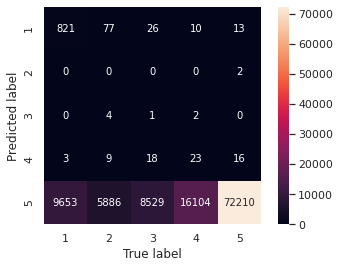

Accuracy:	0.644184
F1-score:	0.185809
Precision:	0.397136
Recall:		0.215895

Classification performance:
              precision    recall  f1-score   support

           1       0.87      0.08      0.14     10477
           2       0.00      0.00      0.00      5976
           3       0.14      0.00      0.00      8574
           4       0.33      0.00      0.00     16139
           5       0.64      1.00      0.78     72241

    accuracy                           0.64    113407
   macro avg       0.40      0.22      0.19    113407
weighted avg       0.55      0.64      0.51    113407



In [12]:
# Plot the confusion matrix
score_catagory_labels = [1, 2, 3, 4, 5]

matrix = confusion_matrix(test_labels, nb_predictions)
sns.heatmap(matrix.T, square = True, annot = True, fmt = "d", 
           xticklabels = score_catagory_labels, yticklabels = score_catagory_labels)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

# Compute and print classification performance metrics
print("Accuracy:\t%f" % accuracy_score(test_labels, nb_predictions))
print("F1-score:\t%f" % f1_score(test_labels, nb_predictions, average = "macro"))
print("Precision:\t%f" % precision_score(test_labels, nb_predictions, average = "macro"))
print("Recall:\t\t%f" % recall_score(test_labels, nb_predictions, average = "macro"))
print("\nClassification performance:\n%s" % classification_report(test_labels, nb_predictions))


## Implementation - Task 3
Implement a k-Nearest Neighbours model for predicting the rating of a food review. Train your model on the training set and test it on the test set. Use an appropriate text representation. You must select the best k by examining the performance of the model for $k \in \{1,3,5,7\}$, using an appropriate cross-validation approach. Create a plot for k vs. classification performance to justify your choice. (**10%**)

In [13]:
# Train word2vec word embedding model using train data to create denser vectors  
w2v_word_embeddings = gensim.models.Word2Vec(train_data_tokenised, min_count = 1, 
                                             vector_size = 300, window = 5)

# TODO: Explain why vector_size and window chosen 


In [14]:
def text_to_vector(text, w2v_word_embeddings):
    """Function to trasform text (a review) in the form of a list of word embeddings into a single 
    vector representation which is the average vector representation of the embedded words in the review."""
    
    vector = sum(w2v_word_embeddings.wv[word] for word in text if word in w2v_word_embeddings.wv) / len(text)
    
    return vector


# Vectorise train data into dense vector representations 
train_data_w2v_vectorized = [text_to_vector(text, w2v_word_embeddings) for text in train_data_tokenised]

# Vectorise test data into dense vector representations 
test_data_w2v_vectorized = [text_to_vector(text, w2v_word_embeddings) for text in test_data_tokenised]


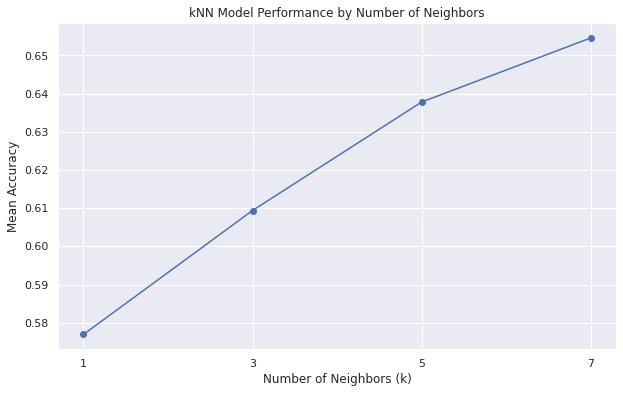

In [15]:
if (run_kNN):
    
    # Values of k to test 
    k_values = [1, 3, 5, 7]
    
    mean_accuracies = []
    
    for k in k_values:
        
        knn_model = KNeighborsClassifier(n_neighbors = k)
        
        scores = cross_val_score(knn_model, train_data_w2v_vectorized, train_labels, cv = 5, scoring = "accuracy")
        
        # TODO: Explain why Accuracy vs F1-Score - If doing class balanced sampling then doesn't matter, 
        # if not then F1-Score makes most sense because of class imbalance 
        
        mean_accuracy = scores.mean()
        
        mean_accuracies.append(mean_accuracy)
        
        
    plt.figure(figsize = (10, 6))
    plt.plot(k_values, mean_accuracies, marker = "o", linestyle = "-", color = "b")
    plt.title("kNN Model Performance by Number of Neighbors")
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("Mean Accuracy")
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()


In [16]:
if (run_kNN):
    
    # k Nearest Neighbour model - input is converted to TF-IDF vectors and then kNN is used 
    # The k value which produced the hgihest accuracy from cross-validation on the train/validation set is used 
    knn_model = KNeighborsClassifier(n_neighbors = k_values[mean_accuracies.index(max(mean_accuracies))])
    
    # Train model 
    knn_model.fit(train_data_w2v_vectorized, train_labels)
    
    # Test model 
    knn_predictions = knn_model.predict(test_data_w2v_vectorized)


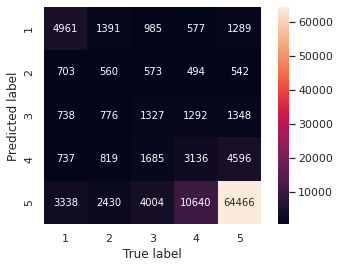

Accuracy:	0.656485
F1-score:	0.374303
Precision:	0.404293
Recall:		0.361736

Classification performance:
              precision    recall  f1-score   support

           1       0.54      0.47      0.50     10477
           2       0.19      0.09      0.13      5976
           3       0.24      0.15      0.19      8574
           4       0.29      0.19      0.23     16139
           5       0.76      0.89      0.82     72241

    accuracy                           0.66    113407
   macro avg       0.40      0.36      0.37    113407
weighted avg       0.60      0.66      0.62    113407



In [17]:
if (run_kNN):
    
    # Plot the confusion matrix
    score_catagory_labels = [1, 2, 3, 4, 5]
    
    matrix = confusion_matrix(test_labels, knn_predictions)
    sns.heatmap(matrix.T, square = True, annot = True, fmt = "d", 
                xticklabels = score_catagory_labels, yticklabels = score_catagory_labels)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.show()
    
    # Compute and print classification performance metrics
    print("Accuracy:\t%f" % accuracy_score(test_labels, knn_predictions))
    print("F1-score:\t%f" % f1_score(test_labels, knn_predictions, average = "macro"))
    print("Precision:\t%f" % precision_score(test_labels, knn_predictions, average = "macro"))
    print("Recall:\t\t%f" % recall_score(test_labels, knn_predictions, average = "macro"))
    print("\nClassification performance:\n%s" % classification_report(test_labels, knn_predictions))


## Implementation - Task 4
Implement a Convolutional Neural Network (CNN) model for predicting the rating of a food review. The model must have at least two convolutional layers. Train your model on the training set and test it on the test set. Use an appropriate text representation. (**13%**)

## Implementation - Task 5
Implement a Recurrent Neural Network (RNN) or a Long Short-Term Memory (LSTM) model for predicting the rating of a food review. The model must have at least two RNN/LSTM layers. Train your model on the training set and test it on the test set. Use an appropriate text representation. (**12%**)

## Implementation - Task 6
Compute the confusion matrix, accuracy, F1-score, precision and recall for each model. (10%)

## Implementation - Task 7
Store the **four** trained models in files and implement a function `predict_food_review(text, model)` that given a <ins>text string</ins> (“`text`”) and model <ins>filename</ins> (“`model`”), it will load the pre-trained model, and predict the food review rating of the input text. The function should be able to work without requiring to rerun all or part of your code. (**10%**)

## Report - Task 1
Critical discussion about the dataset (suitability, problems, class balance, etc.). (**6%**)

YOUR ANSWER HERE

## Report - Task 2
Description and justification of the data preparation step(s) used. (**6%**)

YOUR ANSWER HERE

## Report - Task 3
Description and commentary on the machine learning architectures used, including a description and justification of the text representation method(s) used. (**7%**)

YOUR ANSWER HERE

## Report - Task 4
Detailed performance evaluation of the trained machine learning models in terms of the computed performance metrics. (**5%**)

YOUR ANSWER HERE

## Report - Task 5
Critical discussion on the achieved results, including potential limitations and usage instructions/suggestions. (**6%**)

YOUR ANSWER HERE